In [1]:
# Import libraries
import pickle, math, time, random, datetime
from datetime import date, timedelta, datetime
from time import time

# Data analysis and wrangling libraries
import numpy as np # linear algebra
import pandas as pd # data processing
from pandas import DataFrame
from pandas_profiling import ProfileReport
pd.set_option('max_columns', None)

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Import statements required for Plotly library (for interactive plotting)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

# Preprocessing libraries
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler

# Machine learning libraries
from sklearn import model_selection, tree, metrics, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import ShuffleSplit, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, learning_curve, cross_val_score
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
import xgboost
import xgboost as xgb

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/EmployeeAttrition.csv')
data

Attrition  Age  Gender MaritalStatus  DistanceFromHome  \
0          Yes   41  Female        Single                 1   
1           No   49    Male       Married                 8   
2          Yes   37    Male        Single                 2   
3           No   33  Female       Married                 3   
4           No   27    Male       Married                 2   
...        ...  ...     ...           ...               ...   
1465        No   36    Male       Married                23   
1466        No   39    Male       Married                 6   
1467        No   27    Male       Married                 4   
1468        No   49    Male       Married                 2   
1469        No   34    Male       Married                 8   

      TotalWorkingYears  NumCompaniesWorked  MonthlyIncome  \
0                     8                   8           5993   
1                    10                   1           5130   
2                     7                   6           2090   
3                     8                   1           2909   
4                     6                   9           3468   
...                 ...                 ...            ...   
1465                 17                   4           2571   
1466                  9                   4           9991   
1467                  6                   1           6142   
1468                 17                   2           5390   
1469                  6                   2           4404   

                        JobRole  YearsAtCompany  YearsWithCurrManager  \
0               Sales Executive               6                     5   
1            Research Scientist              10                     7   
2         Laboratory Technician               0                     0   
3            Research Scientist               8                     0   
4         Laboratory Technician               2                     2   
...                         ...             ...                   ...   
1465      Laboratory Technician               5                     3   
1466  Healthcare Representative               7                     7   
1467     Manufacturing Director               6                     3   
1468            Sales Executive               9                     8   
1469      Laboratory Technician               4                     2   

      YearsInCurrentRole  YearsSinceLastPromotion  JobSatisfaction  \
0                      4                        0                4   
1                      7                        1                2   
2                      0                        0                3   
3                      7                        3                3   
4                      2                        2                2   
...                  ...                      ...              ...   
1465                   2                        0                4   
1466                   7                        1                1   
1467                   2                        0                2   
1468                   6                        0                2   
1469                   3                        1                3   

      EnvironmentSatisfaction  RelationshipSatisfaction  WorkLifeBalance  
0                           2                         1                1  
1                           3                         4                3  
2                           4                         2                3  
3                           4                         3                3  
4                           1                         4                3  
...                       ...                       ...              ...  
1465                        3                         3                3  
1466                        4                         1                3  
1467                        2                         2                3  
1468                        4      

In [3]:
data.shape

(1470, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   TotalWorkingYears         1470 non-null   int64 
 6   NumCompaniesWorked        1470 non-null   int64 
 7   MonthlyIncome             1470 non-null   int64 
 8   JobRole                   1470 non-null   object
 9   YearsAtCompany            1470 non-null   int64 
 10  YearsWithCurrManager      1470 non-null   int64 
 11  YearsInCurrentRole        1470 non-null   int64 
 12  YearsSinceLastPromotion   1470 non-null   int64 
 13  JobSatisfaction           1470 non-null   int64 
 14  EnvironmentSatisfaction 

In [5]:
# Find columns with null value
data.isnull().sum()

Attrition                   0
Age                         0
Gender                      0
MaritalStatus               0
DistanceFromHome            0
TotalWorkingYears           0
NumCompaniesWorked          0
MonthlyIncome               0
JobRole                     0
YearsAtCompany              0
YearsWithCurrManager        0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
JobSatisfaction             0
EnvironmentSatisfaction     0
RelationshipSatisfaction    0
WorkLifeBalance             0
dtype: int64

In [6]:
data.describe()

Age  DistanceFromHome  TotalWorkingYears  NumCompaniesWorked  \
count  1470.000000       1470.000000        1470.000000         1470.000000   
mean     36.923810          9.192517          11.279592            2.693197   
std       9.135373          8.106864           7.780782            2.498009   
min      18.000000          1.000000           0.000000            0.000000   
25%      30.000000          2.000000           6.000000            1.000000   
50%      36.000000          7.000000          10.000000            2.000000   
75%      43.000000         14.000000          15.000000            4.000000   
max      60.000000         29.000000          40.000000            9.000000   

       MonthlyIncome  YearsAtCompany  YearsWithCurrManager  \
count    1470.000000     1470.000000           1470.000000   
mean     6502.931293        7.008163              4.123129   
std      4707.956783        6.126525              3.568136   
min      1009.000000        0.000000              0.000000   
25%      2911.000000        3.000000              2.000000   
50%      4919.000000        5.000000              3.000000   
75%      8379.000000        9.000000              7.000000   
max     19999.000000       40.000000             17.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  JobSatisfaction  \
count         1470.000000              1470.000000      1470.000000   
mean             4.229252                 2.187755         2.728571   
std              3.623137                 3.222430         1.102846   
min              0.000000                 0.000000         1.000000   
25%              2.000000                 0.000000         2.000000   
50%              3.000000                 1.000000         3.000000   
75%              7.000000                 3.000000         4.000000   
max             18.000000                15.000000         4.000000   

       EnvironmentSatisfaction  RelationshipSatisfaction  WorkLifeBalance  
count              1470.000000               1470.000000      1470.000000  
mean                  2.721769                  2.712245         2.761224  
std                   1.093082                  1.081209         0.706476  
min                   1.000000                  1.000000         1.000000  
25%                   2.000000                  2.000000         2.000000  
50%                   3.000000                  3.000000         3.000000  
75%                   4.000000                  4.000000         3.000000  
max                   4.000000                  4.000000         4.000000

In [7]:
data.corr()

Age  DistanceFromHome  TotalWorkingYears  \
Age                       1.000000         -0.001686           0.680381   
DistanceFromHome         -0.001686          1.000000           0.004628   
TotalWorkingYears         0.680381          0.004628           1.000000   
NumCompaniesWorked        0.299635         -0.029251           0.237639   
MonthlyIncome             0.497855         -0.017014           0.772893   
YearsAtCompany            0.311309          0.009508           0.628133   
YearsWithCurrManager      0.202089          0.014406           0.459188   
YearsInCurrentRole        0.212901          0.018845           0.460365   
YearsSinceLastPromotion   0.216513          0.010029           0.404858   
JobSatisfaction          -0.004892         -0.003669          -0.020185   
EnvironmentSatisfaction   0.010146         -0.016075          -0.002693   
RelationshipSatisfaction  0.053535          0.006557           0.024054   
WorkLifeBalance          -0.021490         -0.026556           0.001008   

                          NumCompaniesWorked  MonthlyIncome  YearsAtCompany  \
Age                                 0.299635       0.497855        0.311309   
DistanceFromHome                   -0.029251      -0.017014        0.009508   
TotalWorkingYears                   0.237639       0.772893        0.628133   
NumCompaniesWorked                  1.000000       0.149515       -0.118421   
MonthlyIncome                       0.149515       1.000000        0.514285   
YearsAtCompany                     -0.118421       0.514285        1.000000   
YearsWithCurrManager               -0.110319       0.344079        0.769212   
YearsInCurrentRole                 -0.090754       0.363818        0.758754   
YearsSinceLastPromotion            -0.036814       0.344978        0.618409   
JobSatisfaction                    -0.055699      -0.007157       -0.003803   
EnvironmentSatisfaction             0.012594      -0.006259        0.001458   
RelationshipSatisfaction            0.052733       0.025873        0.019367   
WorkLifeBalance                    -0.008366       0.030683        0.012089   

                          YearsWithCurrManager  YearsInCurrentRole  \
Age                                   0.202089            0.212901   
DistanceFromHome                      0.014406            0.018845   
TotalWorkingYears                     0.459188            0.460365   
NumCompaniesWorked                   -0.110319           -0.090754   
MonthlyIncome                         0.344079            0.363818   
YearsAtCompany                        0.769212            0.758754   
YearsWithCurrManager                  1.000000            0.714365   
YearsInCurrentRole                    0.714365            1.000000   
YearsSinceLastPromotion               0.510224            0.548056   
JobSatisfaction                      -0.027656           -0.002305   
EnvironmentSatisfaction              -0.004999            0.018007   
RelationshipSatisfaction             -0.000867           -0.015123   
WorkLifeBalance                       0.002759            0.049856   

                          YearsSinceLastPromotion  JobSatisfaction  \
Age                                      0.216513        -0.004892   
DistanceFromHome                         0.010029        -0.003669   
TotalWorkingYears                        0.404858        -0.020185   
NumCompaniesWorked                      -0.036814        -0.055699   
MonthlyIncome                            0.344978        -0.007157   
YearsAtCompany                           0.618409        -0.003803   
YearsWithCurrManager                     0.510224        -0.027656   
YearsInCurrentRole                       0.548056        -0.002305   
YearsSinceLastPromotion                  1.000000        -0.018214   
JobSatisfaction                         -0.018214         1.000000   
EnvironmentSatisfaction                  0.016194        -0.006784   
RelationshipSatisfaction                 0.033493   

In [8]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

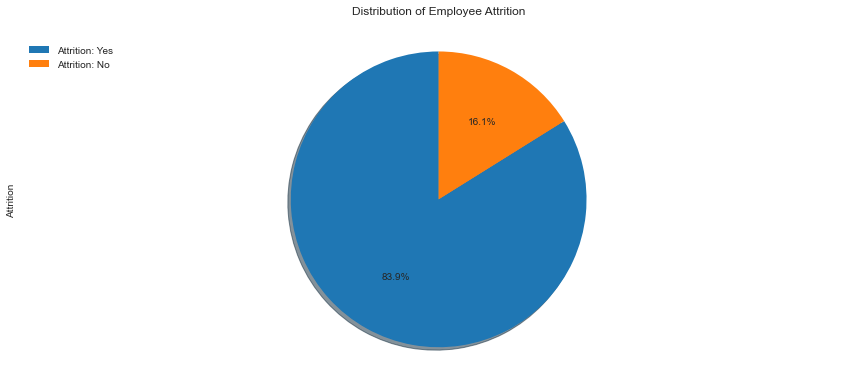

In [9]:
# Exploratory data visualization

labels = 'Attrition: Yes','Attrition: No'
data['Attrition'].astype(str).value_counts().plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=90,    
                            shadow=True, labels=None)

plt.title('Distribution of Employee Attrition', y=1.05) 
plt.axis('equal')

# Add legend
plt.legend(labels=labels, loc='upper left') 

# Show plot
plt.savefig('images/Distribution of Employee Attrition')
plt.show()

In [10]:
# Data visualization
# Categorical demographic features: Gender, MaritalStatus, JobRole

def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,5))
  
    # Count plot
    data[col_name].value_counts().plot.bar(cmap='Set3',ax=ax[0])
    ax[0].set_title(f'Number of Employee by {col_name}')
    ax[0].set_xlabel(f'{col_name}')
    ax[0].set_ylabel('Count')
 
    # Attrition count per factors
    g2 = sns.countplot(col_name, hue='Attrition',data=data, ax=ax[1], palette='Set3')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=90) 

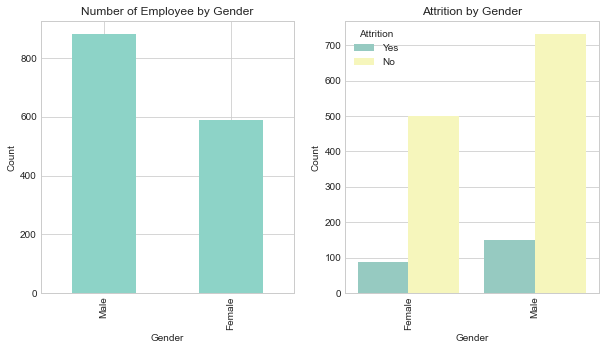

In [11]:
categorical_column_viz('Gender')
plt.savefig('images/Attrition by Gender')

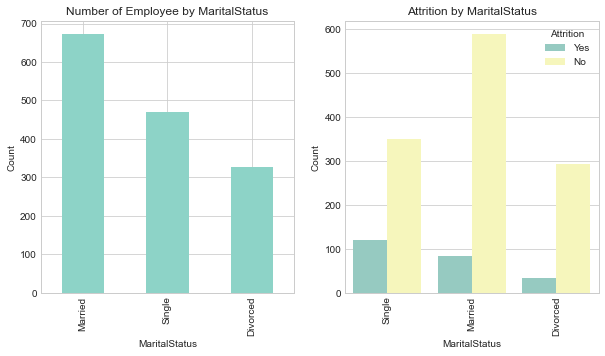

In [12]:
categorical_column_viz('MaritalStatus')
plt.savefig('images/Attrition by Marital Status')

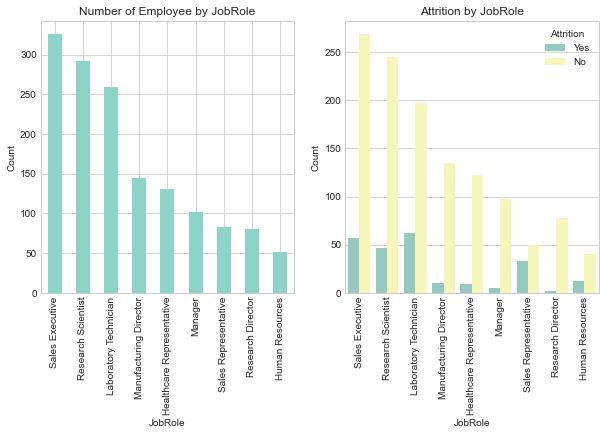

In [13]:
categorical_column_viz('JobRole')
plt.savefig('images/Attrition by Job Role')

In [14]:
# Data visualization
# Employee ratings related demographic features: JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction, WorkLifeBalance

def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,5))
  
    # Count plot
    data[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[0].set_title(f'Employee Rating on {col_name}')
    ax[0].set_xlabel(f'{col_name}')
    ax[0].set_ylabel('Count')
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 0)
 
    # Attrition count per factors
    g2 = sns.countplot(col_name, hue='Attrition',data=data, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by Rating on {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')
    g2.set_xticklabels(g2.get_xticklabels()) 

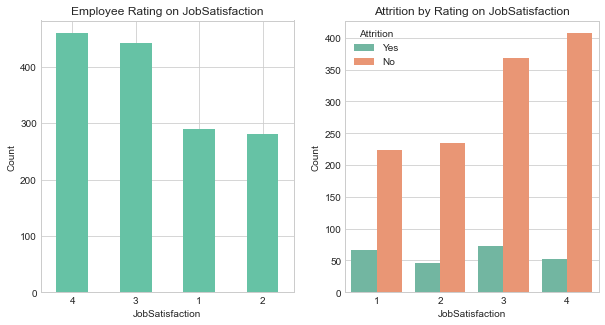

In [15]:
categorical_column_viz('JobSatisfaction')
plt.savefig('images/Attrition by Rating on JobS atisfaction')

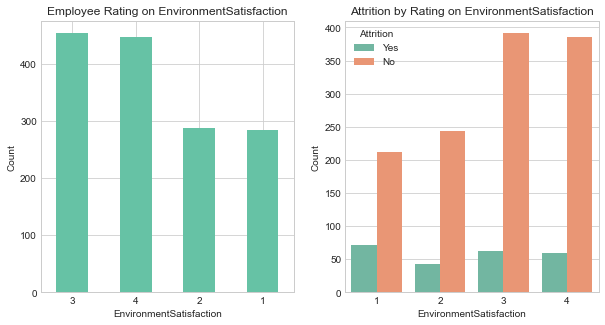

In [16]:
categorical_column_viz('EnvironmentSatisfaction')
plt.savefig('images/Attrition by Rating on Environment Satisfaction')

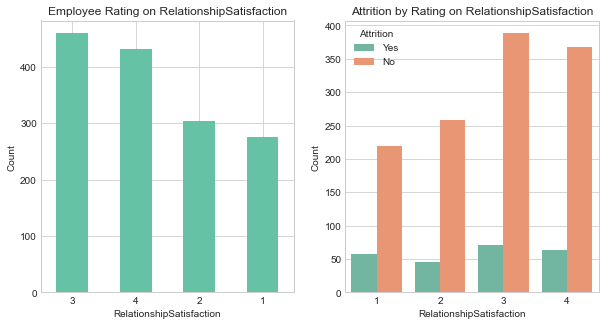

In [17]:
categorical_column_viz('RelationshipSatisfaction')
plt.savefig('images/Attrition by Rating on Relationship Satisfaction')

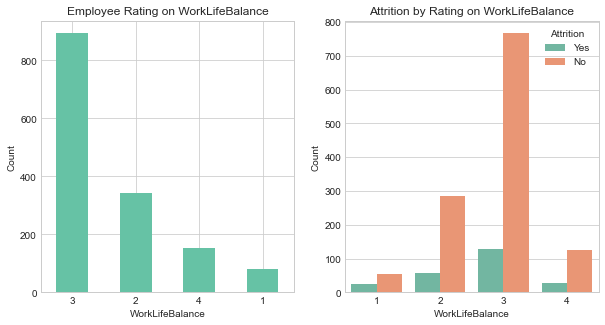

In [18]:
categorical_column_viz('WorkLifeBalance')
plt.savefig('images/Attrition by Rating on Work-Life Balance')

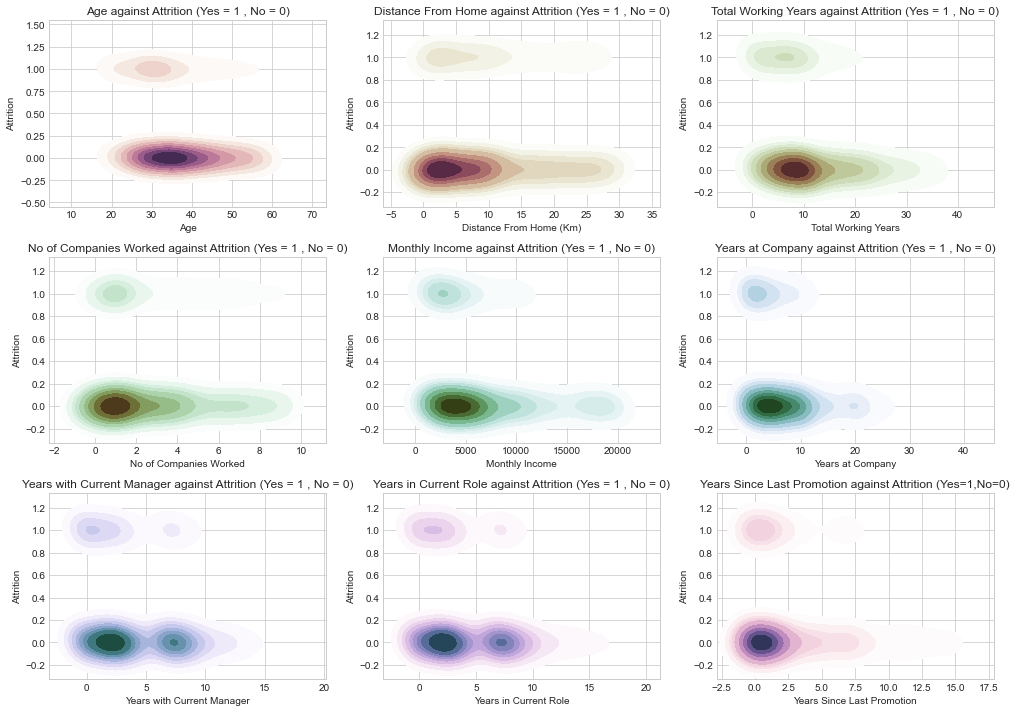

In [19]:
# Visualization of numerical demographic features

data['Attrition'] = data['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )

f, axes = plt.subplots(3, 3, figsize=(14, 10), sharex=False, sharey=False)

# Define colormap scheme
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = data['Age'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set(title = 'Age against Attrition (Yes = 1 , No = 0)')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
x = data['DistanceFromHome'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set(title = 'Distance From Home against Attrition (Yes = 1 , No = 0)')
axes[0,1].set_xlabel('Distance From Home (Km)')
axes[0,1].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
x = data['TotalWorkingYears'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set(title = 'Total Working Years against Attrition (Yes = 1 , No = 0)')
axes[0,2].set_xlabel('Total Working Years')
axes[0,2].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
x = data['NumCompaniesWorked'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set(title = 'No of Companies Worked against Attrition (Yes = 1 , No = 0)')
axes[1,0].set_xlabel('No of Companies Worked')
axes[1,0].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
x = data['MonthlyIncome'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set(title = 'Monthly Income against Attrition (Yes = 1 , No = 0)')
axes[1,1].set_xlabel('Monthly Income')
axes[1,1].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
x = data['YearsAtCompany'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set(title = 'Years at Company against Attrition (Yes = 1 , No = 0)')
axes[1,2].set_xlabel('Years at Company')
axes[1,2].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
x = data['YearsWithCurrManager'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set(title = 'Years with Current Manager against Attrition (Yes = 1 , No = 0)')
axes[2,0].set_xlabel('Years with Current Manager')
axes[2,0].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
x = data['YearsInCurrentRole'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set(title = 'Years in Current Role against Attrition (Yes = 1 , No = 0)')
axes[2,1].set_xlabel('Years in Current Role')
axes[2,1].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
x = data['YearsSinceLastPromotion'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set(title = 'Years Since Last Promotion against Attrition (Yes=1,No=0)')
axes[2,2].set_xlabel('Years Since Last Promotion')
axes[2,2].set_ylabel('Attrition')

f.tight_layout()
plt.savefig('images/Numerical Features against Attrition')

In [20]:
# Feature engineering
# Label encoding categorial data

le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','Gender','MaritalStatus','JobRole']
for i in categorial_variables:
    data[i] = le.fit_transform(data[i])
data.to_csv('datasets/CleanedData.csv')
data.head(5)

Attrition  Age  Gender  MaritalStatus  DistanceFromHome  TotalWorkingYears  \
0          1   41       0              2                 1                  8   
1          0   49       1              1                 8                 10   
2          1   37       1              2                 2                  7   
3          0   33       0              1                 3                  8   
4          0   27       1              1                 2                  6   

   NumCompaniesWorked  MonthlyIncome  JobRole  YearsAtCompany  \
0                   8           5993        7               6   
1                   1           5130        6              10   
2                   6           2090        2               0   
3                   1           2909        6               8   
4                   9           3468        2               2   

   YearsWithCurrManager  YearsInCurrentRole  YearsSinceLastPromotion  \
0                     5                   4                        0   
1                     7                   7                        1   
2                     0                   0                        0   
3                     0                   7                        3   
4                     2                   2                        2   

   JobSatisfaction  EnvironmentSatisfaction  RelationshipSatisfaction  \
0                4                        2                         1   
1                2                        3                         4   
2                3                        4                         2   
3                3                        4                         3   
4                2                        1                         4   

   WorkLifeBalance  
0                1  
1                3  
2                3  
3                3  
4                3

In [21]:
target = data['Attrition']
train = data.drop('Attrition',axis = 1)
train.shape

(1470, 16)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train,target,test_size=0.30,random_state=42)

In [23]:
print(f"Train Dataset Shape: {X_train.shape} , Test Dataset Shape: {X_test.shape}")

Train Dataset Shape: (1029, 16) , Test Dataset Shape: (441, 16)


In [24]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train,y_train, cv):
    
    # One pass specification
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # 10-fold cross validation 
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs = -1)
    
    # 10-fold cross validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [25]:
# Logistic Regression

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train,y_train, 10)
print("Training Accuracy: %s" % acc_log)
print("Validation Accuracy: %s" % acc_cv_log)

Training Accuracy: 83.67
Validation Accuracy: 83.87


In [26]:
# Support Vector Machine (SVM)

train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(SVC(),X_train,y_train,10)
print("Training Accuracy: %s" % acc_svc)
print("Validation Accuracy: %s" % acc_cv_svc)

Training Accuracy: 82.9
Validation Accuracy: 82.9


In [27]:
# Linear Support Vector Classifier (SVC)

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),X_train, y_train,10)
print("Training Accuracy: %s" % acc_linear_svc)
print("Validation Accuracy: %s" % acc_cv_linear_svc)

Training Accuracy: 83.48
Validation Accuracy: 69.48


In [28]:
# K-Nearest Neighbours

train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3),X_train,y_train,10)
print("Training Accuracy: %s" % acc_knn)
print("Validation Accuracy: %s" % acc_cv_knn)

Training Accuracy: 86.2
Validation Accuracy: 79.69


In [29]:
# Gaussian Naive Bayes

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),X_train,y_train,10)
print("Training Accuracy: %s" % acc_gaussian)
print("Validation Accuracy: %s" % acc_cv_gaussian)

Training Accuracy: 76.19
Validation Accuracy: 74.93


In [30]:
# Perceptron

train_pred_gaussian, acc_perceptron, acc_cv_perceptron = fit_ml_algo(Perceptron(),X_train,y_train,10)
print("Training Accuracy: %s" % acc_perceptron)
print("Validation Accuracy: %s" % acc_cv_perceptron)

Training Accuracy: 82.9
Validation Accuracy: 76.38


In [31]:
# Stochastic Gradient Descent

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),X_train, y_train,10)
print("Training Accuracy: %s" % acc_sgd)
print("Validation Accuracy: %s" % acc_cv_sgd)

Training Accuracy: 82.9
Validation Accuracy: 75.7


In [32]:
# Decision Tree

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),X_train, y_train,10)
print("Training Accuracy: %s" % acc_dt)
print("Validation Accuracy: %s" % acc_cv_dt)

Training Accuracy: 100.0
Validation Accuracy: 75.9


In [33]:
# Gradient Boosting Trees

train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),X_train, y_train,10)
print("Training Accuracy: %s" % acc_gbt)
print("Validation Accuracy: %s" % acc_cv_gbt)

Training Accuracy: 93.39
Validation Accuracy: 84.45


In [34]:
# Random Forest

train_pred_dt, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100),X_train, y_train,10)
print("Training Accuracy: %s" % acc_rf)
print("Validation Accuracy: %s" % acc_cv_rf)

Training Accuracy: 100.0
Validation Accuracy: 84.74


In [35]:
# Neural Network (Multi-layer Perceptron)

train_pred_nn, acc_nn, acc_cv_nn = fit_ml_algo(MLPClassifier(max_iter=1500),X_train, y_train,10)
print("Training Accuracy: %s" % acc_nn)
print("Validation Accuracy: %s" % acc_cv_nn)

Training Accuracy: 83.19
Validation Accuracy: 67.06


In [36]:
# CatBoost Classifier
# Define the categorical features for the CatBoost model

cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [37]:
# Pool training data and categorical feature labels together
train_pool = Pool(X_train, y_train, cat_features)  

In [38]:
# CatBoost model
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.010429
0:	learn: 0.6851494	total: 175ms	remaining: 2m 55s
1:	learn: 0.6790223	total: 207ms	remaining: 1m 43s
2:	learn: 0.6739165	total: 214ms	remaining: 1m 10s
3:	learn: 0.6676504	total: 238ms	remaining: 59.2s
4:	learn: 0.6627776	total: 246ms	remaining: 49s
5:	learn: 0.6579193	total: 254ms	remaining: 42.1s
6:	learn: 0.6532834	total: 263ms	remaining: 37.3s
7:	learn: 0.6487483	total: 268ms	remaining: 33.3s
8:	learn: 0.6442824	total: 277ms	remaining: 30.4s
9:	learn: 0.6384844	total: 307ms	remaining: 30.4s
10:	learn: 0.6342675	total: 313ms	remaining: 28.1s
11:	learn: 0.6284711	total: 342ms	remaining: 28.2s
12:	learn: 0.6243363	total: 356ms	remaining: 27.1s
13:	learn: 0.6195764	total: 390ms	remaining: 27.5s
14:	learn: 0.6157457	total: 401ms	remaining: 26.4s
15:	learn: 0.6120117	total: 406ms	remaining: 24.9s
16:	learn: 0.6067710	total: 436ms	remaining: 25.2s
17:	learn: 0.6027703	total: 450ms	remaining: 24.5s
18:	learn: 0.5989892	total: 463ms	remaining: 23.9s
19:	learn:

161:	learn: 0.3782987	total: 4.41s	remaining: 22.8s
162:	learn: 0.3776165	total: 4.46s	remaining: 22.9s
163:	learn: 0.3774488	total: 4.47s	remaining: 22.8s
164:	learn: 0.3764776	total: 4.5s	remaining: 22.8s
165:	learn: 0.3758721	total: 4.53s	remaining: 22.8s
166:	learn: 0.3753601	total: 4.56s	remaining: 22.7s
167:	learn: 0.3748883	total: 4.59s	remaining: 22.7s
168:	learn: 0.3746629	total: 4.62s	remaining: 22.7s
169:	learn: 0.3741082	total: 4.65s	remaining: 22.7s
170:	learn: 0.3736120	total: 4.68s	remaining: 22.7s
171:	learn: 0.3730518	total: 4.71s	remaining: 22.6s
172:	learn: 0.3727541	total: 4.73s	remaining: 22.6s
173:	learn: 0.3721132	total: 4.75s	remaining: 22.6s
174:	learn: 0.3717438	total: 4.78s	remaining: 22.5s
175:	learn: 0.3710111	total: 4.81s	remaining: 22.5s
176:	learn: 0.3702333	total: 4.84s	remaining: 22.5s
177:	learn: 0.3701066	total: 4.86s	remaining: 22.4s
178:	learn: 0.3696596	total: 4.88s	remaining: 22.4s
179:	learn: 0.3691014	total: 4.91s	remaining: 22.4s
180:	learn: 0

325:	learn: 0.3135046	total: 9.17s	remaining: 19s
326:	learn: 0.3132836	total: 9.2s	remaining: 18.9s
327:	learn: 0.3129880	total: 9.23s	remaining: 18.9s
328:	learn: 0.3128650	total: 9.26s	remaining: 18.9s
329:	learn: 0.3126635	total: 9.29s	remaining: 18.9s
330:	learn: 0.3126447	total: 9.3s	remaining: 18.8s
331:	learn: 0.3123002	total: 9.32s	remaining: 18.8s
332:	learn: 0.3121923	total: 9.35s	remaining: 18.7s
333:	learn: 0.3118779	total: 9.38s	remaining: 18.7s
334:	learn: 0.3114949	total: 9.41s	remaining: 18.7s
335:	learn: 0.3111512	total: 9.44s	remaining: 18.7s
336:	learn: 0.3107885	total: 9.47s	remaining: 18.6s
337:	learn: 0.3102831	total: 9.51s	remaining: 18.6s
338:	learn: 0.3099696	total: 9.54s	remaining: 18.6s
339:	learn: 0.3095197	total: 9.57s	remaining: 18.6s
340:	learn: 0.3091318	total: 9.6s	remaining: 18.6s
341:	learn: 0.3088217	total: 9.63s	remaining: 18.5s
342:	learn: 0.3086180	total: 9.66s	remaining: 18.5s
343:	learn: 0.3080120	total: 9.69s	remaining: 18.5s
344:	learn: 0.307

485:	learn: 0.2729356	total: 13.9s	remaining: 14.7s
486:	learn: 0.2727200	total: 13.9s	remaining: 14.7s
487:	learn: 0.2726785	total: 13.9s	remaining: 14.6s
488:	learn: 0.2723582	total: 14s	remaining: 14.6s
489:	learn: 0.2721289	total: 14s	remaining: 14.6s
490:	learn: 0.2720645	total: 14s	remaining: 14.5s
491:	learn: 0.2718109	total: 14s	remaining: 14.5s
492:	learn: 0.2715979	total: 14.1s	remaining: 14.5s
493:	learn: 0.2714353	total: 14.1s	remaining: 14.4s
494:	learn: 0.2713437	total: 14.1s	remaining: 14.4s
495:	learn: 0.2711040	total: 14.2s	remaining: 14.4s
496:	learn: 0.2709459	total: 14.2s	remaining: 14.4s
497:	learn: 0.2705696	total: 14.2s	remaining: 14.3s
498:	learn: 0.2703571	total: 14.3s	remaining: 14.3s
499:	learn: 0.2702872	total: 14.3s	remaining: 14.3s
500:	learn: 0.2702252	total: 14.3s	remaining: 14.3s
501:	learn: 0.2699365	total: 14.3s	remaining: 14.2s
502:	learn: 0.2697870	total: 14.4s	remaining: 14.2s
503:	learn: 0.2695631	total: 14.4s	remaining: 14.2s
504:	learn: 0.269509

648:	learn: 0.2422441	total: 18.7s	remaining: 10.1s
649:	learn: 0.2419179	total: 18.7s	remaining: 10.1s
650:	learn: 0.2418959	total: 18.7s	remaining: 10s
651:	learn: 0.2417456	total: 18.8s	remaining: 10s
652:	learn: 0.2416006	total: 18.8s	remaining: 9.99s
653:	learn: 0.2414612	total: 18.8s	remaining: 9.96s
654:	learn: 0.2414179	total: 18.9s	remaining: 9.93s
655:	learn: 0.2414167	total: 18.9s	remaining: 9.89s
656:	learn: 0.2410536	total: 18.9s	remaining: 9.87s
657:	learn: 0.2407515	total: 18.9s	remaining: 9.85s
658:	learn: 0.2405743	total: 19s	remaining: 9.82s
659:	learn: 0.2404260	total: 19s	remaining: 9.79s
660:	learn: 0.2401093	total: 19s	remaining: 9.76s
661:	learn: 0.2399984	total: 19.1s	remaining: 9.73s
662:	learn: 0.2398506	total: 19.1s	remaining: 9.7s
663:	learn: 0.2397489	total: 19.1s	remaining: 9.67s
664:	learn: 0.2396933	total: 19.1s	remaining: 9.64s
665:	learn: 0.2396653	total: 19.2s	remaining: 9.61s
666:	learn: 0.2393943	total: 19.2s	remaining: 9.58s
667:	learn: 0.2392982	t

811:	learn: 0.2166349	total: 23.7s	remaining: 5.49s
812:	learn: 0.2164517	total: 23.7s	remaining: 5.46s
813:	learn: 0.2164104	total: 23.8s	remaining: 5.43s
814:	learn: 0.2163856	total: 23.8s	remaining: 5.41s
815:	learn: 0.2161110	total: 23.9s	remaining: 5.38s
816:	learn: 0.2160914	total: 23.9s	remaining: 5.35s
817:	learn: 0.2159706	total: 23.9s	remaining: 5.32s
818:	learn: 0.2157759	total: 23.9s	remaining: 5.29s
819:	learn: 0.2157372	total: 24s	remaining: 5.26s
820:	learn: 0.2155923	total: 24s	remaining: 5.23s
821:	learn: 0.2155260	total: 24s	remaining: 5.2s
822:	learn: 0.2153366	total: 24.1s	remaining: 5.17s
823:	learn: 0.2153242	total: 24.1s	remaining: 5.14s
824:	learn: 0.2152039	total: 24.1s	remaining: 5.11s
825:	learn: 0.2150299	total: 24.1s	remaining: 5.08s
826:	learn: 0.2149717	total: 24.2s	remaining: 5.06s
827:	learn: 0.2149073	total: 24.2s	remaining: 5.03s
828:	learn: 0.2148946	total: 24.2s	remaining: 5s
829:	learn: 0.2147856	total: 24.3s	remaining: 4.97s
830:	learn: 0.2147018	

977:	learn: 0.1953244	total: 29.4s	remaining: 661ms
978:	learn: 0.1952265	total: 29.4s	remaining: 631ms
979:	learn: 0.1950913	total: 29.4s	remaining: 601ms
980:	learn: 0.1948917	total: 29.5s	remaining: 571ms
981:	learn: 0.1948577	total: 29.5s	remaining: 541ms
982:	learn: 0.1947455	total: 29.5s	remaining: 511ms
983:	learn: 0.1946446	total: 29.6s	remaining: 481ms
984:	learn: 0.1946119	total: 29.6s	remaining: 451ms
985:	learn: 0.1944491	total: 29.6s	remaining: 421ms
986:	learn: 0.1943976	total: 29.7s	remaining: 391ms
987:	learn: 0.1941597	total: 29.7s	remaining: 361ms
988:	learn: 0.1940752	total: 29.7s	remaining: 331ms
989:	learn: 0.1938951	total: 29.7s	remaining: 300ms
990:	learn: 0.1938360	total: 29.8s	remaining: 270ms
991:	learn: 0.1937082	total: 29.8s	remaining: 240ms
992:	learn: 0.1935125	total: 29.9s	remaining: 210ms
993:	learn: 0.1933508	total: 29.9s	remaining: 180ms
994:	learn: 0.1933076	total: 29.9s	remaining: 150ms
995:	learn: 0.1932195	total: 29.9s	remaining: 120ms
996:	learn: 

In [39]:
# Set parameters for cross validation as same as initial model
cv_params = catboost_model.get_params()

# 10-fold cross validation
cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)

# 10-fold cross validation accuracy metric
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6757336	test: 0.6760505	best: 0.6760505 (0)
1:	learn: 0.6605570	test: 0.6611787	best: 0.6611787 (1)
2:	learn: 0.6451688	test: 0.6455889	best: 0.6455889 (2)
3:	learn: 0.6309249	test: 0.6317550	best: 0.6317550 (3)
4:	learn: 0.6176238	test: 0.6191908	best: 0.6191908 (4)
5:	learn: 0.6060618	test: 0.6078350	best: 0.6078350 (5)
6:	learn: 0.5945687	test: 0.5964804	best: 0.5964804 (6)
7:	learn: 0.5835436	test: 0.5856405	best: 0.5856405 (7)
8:	learn: 0.5726350	test: 0.5748806	best: 0.5748806 (8)
9:	learn: 0.5628308	test: 0.5650950	best: 0.5650950 (9)
10:	learn: 0.5531669	test: 0.5555611	best: 0.5555611 (10)
11:	learn: 0.5446669	test: 0.5474128	best: 0.5474128 (11)
12:	learn: 0.5365319	test: 0.5396810	best: 0.5396810 (12)
13:	learn: 0.5288573	test: 0.5322712	best: 0.5322712 (13)
14:	learn: 0.5215569	test: 0.5253674	best: 0.5253674 (14)
15:	learn: 0.5144671	test: 0.5184025	best: 0.5184025 (15)
16:	learn: 0.5078581	test: 0.5122567	best: 0.5122567 (16)
17:	learn: 0.5014650	test: 0.50617

150:	learn: 0.2854020	test: 0.3913950	best: 0.3913950 (150)
151:	learn: 0.2847016	test: 0.3912226	best: 0.3912226 (151)
152:	learn: 0.2841582	test: 0.3910668	best: 0.3910668 (152)
153:	learn: 0.2834733	test: 0.3910064	best: 0.3910064 (153)
154:	learn: 0.2828537	test: 0.3910475	best: 0.3910064 (153)
155:	learn: 0.2822882	test: 0.3909856	best: 0.3909856 (155)
156:	learn: 0.2815318	test: 0.3906218	best: 0.3906218 (156)
157:	learn: 0.2808043	test: 0.3907152	best: 0.3906218 (156)
158:	learn: 0.2802172	test: 0.3905736	best: 0.3905736 (158)
159:	learn: 0.2796765	test: 0.3905064	best: 0.3905064 (159)
160:	learn: 0.2790265	test: 0.3904447	best: 0.3904447 (160)
161:	learn: 0.2783189	test: 0.3904122	best: 0.3904122 (161)
162:	learn: 0.2775946	test: 0.3903457	best: 0.3903457 (162)
163:	learn: 0.2770058	test: 0.3901442	best: 0.3901442 (163)
164:	learn: 0.2763191	test: 0.3900340	best: 0.3900340 (164)
165:	learn: 0.2756815	test: 0.3899623	best: 0.3899623 (165)
166:	learn: 0.2750397	test: 0.3898082	be

284:	learn: 0.2125708	test: 0.3883704	best: 0.3878979 (207)
285:	learn: 0.2121995	test: 0.3884027	best: 0.3878979 (207)
286:	learn: 0.2117149	test: 0.3885087	best: 0.3878979 (207)
287:	learn: 0.2113331	test: 0.3885057	best: 0.3878979 (207)
288:	learn: 0.2108518	test: 0.3886518	best: 0.3878979 (207)
289:	learn: 0.2103217	test: 0.3888831	best: 0.3878979 (207)
290:	learn: 0.2100368	test: 0.3889329	best: 0.3878979 (207)
291:	learn: 0.2096284	test: 0.3891443	best: 0.3878979 (207)
292:	learn: 0.2092461	test: 0.3893042	best: 0.3878979 (207)
293:	learn: 0.2089113	test: 0.3891584	best: 0.3878979 (207)	total: 1m 51s	remaining: 4m 27s
294:	learn: 0.2086411	test: 0.3892366	best: 0.3878979 (207)
295:	learn: 0.2082511	test: 0.3892140	best: 0.3878979 (207)
296:	learn: 0.2078338	test: 0.3890609	best: 0.3878979 (207)
297:	learn: 0.2075082	test: 0.3889690	best: 0.3878979 (207)
298:	learn: 0.2072557	test: 0.3890585	best: 0.3878979 (207)
299:	learn: 0.2068152	test: 0.3889583	best: 0.3878979 (207)
300:	lea

416:	learn: 0.1683551	test: 0.3882880	best: 0.3876821 (369)
417:	learn: 0.1680374	test: 0.3881491	best: 0.3876821 (369)
418:	learn: 0.1677948	test: 0.3879986	best: 0.3876821 (369)
419:	learn: 0.1674899	test: 0.3881205	best: 0.3876821 (369)
420:	learn: 0.1670323	test: 0.3882928	best: 0.3876821 (369)
421:	learn: 0.1666822	test: 0.3883314	best: 0.3876821 (369)
422:	learn: 0.1664642	test: 0.3883632	best: 0.3876821 (369)
423:	learn: 0.1662467	test: 0.3883842	best: 0.3876821 (369)
424:	learn: 0.1659004	test: 0.3884988	best: 0.3876821 (369)
425:	learn: 0.1655538	test: 0.3886651	best: 0.3876821 (369)
426:	learn: 0.1651957	test: 0.3887199	best: 0.3876821 (369)
427:	learn: 0.1649069	test: 0.3885356	best: 0.3876821 (369)
428:	learn: 0.1646274	test: 0.3886096	best: 0.3876821 (369)
429:	learn: 0.1643992	test: 0.3886351	best: 0.3876821 (369)
430:	learn: 0.1641185	test: 0.3884642	best: 0.3876821 (369)
431:	learn: 0.1638849	test: 0.3884767	best: 0.3876821 (369)
432:	learn: 0.1635962	test: 0.3883511	be

559:	learn: 0.1323967	test: 0.3904544	best: 0.3876821 (369)
560:	learn: 0.1321970	test: 0.3906129	best: 0.3876821 (369)
561:	learn: 0.1319705	test: 0.3905903	best: 0.3876821 (369)
562:	learn: 0.1317575	test: 0.3906534	best: 0.3876821 (369)
563:	learn: 0.1316134	test: 0.3906578	best: 0.3876821 (369)
564:	learn: 0.1313875	test: 0.3906569	best: 0.3876821 (369)
565:	learn: 0.1312230	test: 0.3908638	best: 0.3876821 (369)
566:	learn: 0.1310123	test: 0.3907624	best: 0.3876821 (369)
567:	learn: 0.1308067	test: 0.3906750	best: 0.3876821 (369)
568:	learn: 0.1306218	test: 0.3906229	best: 0.3876821 (369)
569:	learn: 0.1304637	test: 0.3907140	best: 0.3876821 (369)
570:	learn: 0.1302250	test: 0.3907348	best: 0.3876821 (369)
571:	learn: 0.1299961	test: 0.3906781	best: 0.3876821 (369)
572:	learn: 0.1297419	test: 0.3908399	best: 0.3876821 (369)
573:	learn: 0.1295087	test: 0.3906088	best: 0.3876821 (369)
574:	learn: 0.1292448	test: 0.3906635	best: 0.3876821 (369)
575:	learn: 0.1290889	test: 0.3906012	be

693:	learn: 0.1079476	test: 0.3939702	best: 0.3876821 (369)
694:	learn: 0.1077516	test: 0.3940608	best: 0.3876821 (369)
695:	learn: 0.1075630	test: 0.3940837	best: 0.3876821 (369)
696:	learn: 0.1074050	test: 0.3941691	best: 0.3876821 (369)
697:	learn: 0.1072598	test: 0.3942593	best: 0.3876821 (369)
698:	learn: 0.1069805	test: 0.3942561	best: 0.3876821 (369)
699:	learn: 0.1068812	test: 0.3943938	best: 0.3876821 (369)
700:	learn: 0.1067454	test: 0.3943847	best: 0.3876821 (369)
701:	learn: 0.1065452	test: 0.3944742	best: 0.3876821 (369)
702:	learn: 0.1063046	test: 0.3944500	best: 0.3876821 (369)
703:	learn: 0.1061845	test: 0.3944271	best: 0.3876821 (369)
704:	learn: 0.1060639	test: 0.3944841	best: 0.3876821 (369)	total: 4m 40s	remaining: 1m 57s
705:	learn: 0.1058775	test: 0.3945625	best: 0.3876821 (369)
706:	learn: 0.1057320	test: 0.3944399	best: 0.3876821 (369)
707:	learn: 0.1055648	test: 0.3945173	best: 0.3876821 (369)
708:	learn: 0.1054281	test: 0.3945645	best: 0.3876821 (369)
709:	lea

836:	learn: 0.0880350	test: 0.3990179	best: 0.3876821 (369)
837:	learn: 0.0879372	test: 0.3991317	best: 0.3876821 (369)
838:	learn: 0.0878258	test: 0.3991868	best: 0.3876821 (369)
839:	learn: 0.0877382	test: 0.3992360	best: 0.3876821 (369)
840:	learn: 0.0876381	test: 0.3992466	best: 0.3876821 (369)
841:	learn: 0.0874948	test: 0.3994328	best: 0.3876821 (369)
842:	learn: 0.0873899	test: 0.3994095	best: 0.3876821 (369)
843:	learn: 0.0872358	test: 0.3995470	best: 0.3876821 (369)
844:	learn: 0.0870454	test: 0.3998308	best: 0.3876821 (369)
845:	learn: 0.0869432	test: 0.3999727	best: 0.3876821 (369)
846:	learn: 0.0868957	test: 0.4000334	best: 0.3876821 (369)
847:	learn: 0.0867967	test: 0.4000539	best: 0.3876821 (369)
848:	learn: 0.0866750	test: 0.4000588	best: 0.3876821 (369)
849:	learn: 0.0865727	test: 0.4001162	best: 0.3876821 (369)
850:	learn: 0.0864922	test: 0.4001062	best: 0.3876821 (369)
851:	learn: 0.0863610	test: 0.4002076	best: 0.3876821 (369)
852:	learn: 0.0862437	test: 0.4002708	be

968:	learn: 0.0740647	test: 0.4049347	best: 0.3876821 (369)
969:	learn: 0.0739839	test: 0.4049063	best: 0.3876821 (369)
970:	learn: 0.0739076	test: 0.4049111	best: 0.3876821 (369)
971:	learn: 0.0738232	test: 0.4047709	best: 0.3876821 (369)
972:	learn: 0.0736897	test: 0.4049187	best: 0.3876821 (369)
973:	learn: 0.0736328	test: 0.4049743	best: 0.3876821 (369)
974:	learn: 0.0735335	test: 0.4050683	best: 0.3876821 (369)
975:	learn: 0.0734611	test: 0.4050949	best: 0.3876821 (369)
976:	learn: 0.0733345	test: 0.4052271	best: 0.3876821 (369)
977:	learn: 0.0732258	test: 0.4053327	best: 0.3876821 (369)
978:	learn: 0.0731200	test: 0.4054693	best: 0.3876821 (369)
979:	learn: 0.0730370	test: 0.4055509	best: 0.3876821 (369)
980:	learn: 0.0729739	test: 0.4056062	best: 0.3876821 (369)
981:	learn: 0.0728798	test: 0.4057646	best: 0.3876821 (369)
982:	learn: 0.0727720	test: 0.4059566	best: 0.3876821 (369)
983:	learn: 0.0726979	test: 0.4060472	best: 0.3876821 (369)	total: 6m 40s	remaining: 6.51s
984:	lear

In [40]:
# Light Gradient Boosting Machine (LGBM) Classifier

from lightgbm import LGBMClassifier
train_pred_lgbm, acc_lgbm, acc_cv_lgbm = fit_ml_algo(LGBMClassifier(learning_rate=0.03,n_estimators=1000),X_train, y_train,10)
print("Training Accuracy: %s" % acc_lgbm)
print("Validation Accuracy: %s" % acc_cv_lgbm)

Training Accuracy: 100.0
Validation Accuracy: 84.55


In [41]:
# eXtreme Gradient Boosting (XGBoost) Classifier

train_pred_xgb, acc_xgb, acc_cv_xgb = fit_ml_algo(xgb.XGBClassifier(random_state=42, n_jobs=-1),X_train, y_train,10)
print("Training Accuracy: %s" % acc_xgb)
print("Validation Accuracy: %s" % acc_cv_xgb)

[14:41:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.0
Validation Accuracy: 83.87


In [42]:
Model = ['Logistic Regression','SVM','Linear SVC','KNN','Gaussian Naive Bayes','Perceptron','Stochastic Gradient Decent',
              'Decision Tree', 'Gradient Boosting Trees','Random Forest','Neural Network','CatBoost','LGBM Classifier',
              'XGBoost']
results = DataFrame({
    'Training Accuracy': [acc_log,acc_svc,acc_linear_svc,acc_knn,acc_gaussian,acc_perceptron,acc_sgd,acc_dt,acc_gbt,acc_rf,
        acc_nn,acc_catboost,acc_lgbm,acc_xgb],
    'Validation Accuracy': [acc_cv_log,acc_cv_svc,acc_cv_linear_svc,acc_cv_knn,acc_cv_gaussian,acc_cv_perceptron,acc_cv_sgd,
                      acc_cv_dt,acc_cv_gbt,acc_cv_rf,acc_cv_nn,acc_cv_catboost,acc_cv_lgbm,acc_cv_xgb]
}, index = Model)
results.sort_values(by='Validation Accuracy', ascending=False)

Training Accuracy  Validation Accuracy
CatBoost                                88.63                85.13
Random Forest                          100.00                84.74
LGBM Classifier                        100.00                84.55
Gradient Boosting Trees                 93.39                84.45
Logistic Regression                     83.67                83.87
XGBoost                                100.00                83.87
SVM                                     82.90                82.90
KNN                                     86.20                79.69
Perceptron                              82.90                76.38
Decision Tree                          100.00                75.90
Stochastic Gradient Decent              82.90                75.70
Naive Bayes                             76.19                74.93
Linear SVC                              83.48                69.48
Neural Network                          83.19                67.06

In [43]:
# Predict using CatBoost

model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss').fit(X_train, y_train)

Learning rate set to 0.010429
0:	learn: 0.6861982	total: 3.14ms	remaining: 3.13s
1:	learn: 0.6801814	total: 5.78ms	remaining: 2.88s
2:	learn: 0.6727416	total: 8.4ms	remaining: 2.79s
3:	learn: 0.6660043	total: 10.9ms	remaining: 2.72s
4:	learn: 0.6592220	total: 13.8ms	remaining: 2.75s
5:	learn: 0.6522749	total: 16.8ms	remaining: 2.79s
6:	learn: 0.6452417	total: 19.4ms	remaining: 2.75s
7:	learn: 0.6389853	total: 21.8ms	remaining: 2.7s
8:	learn: 0.6332998	total: 24.3ms	remaining: 2.68s
9:	learn: 0.6274537	total: 26.4ms	remaining: 2.61s
10:	learn: 0.6218138	total: 29.4ms	remaining: 2.64s
11:	learn: 0.6159808	total: 32.2ms	remaining: 2.65s
12:	learn: 0.6093043	total: 34.7ms	remaining: 2.63s
13:	learn: 0.6045114	total: 37.2ms	remaining: 2.62s
14:	learn: 0.5991086	total: 39.7ms	remaining: 2.61s
15:	learn: 0.5938082	total: 42.4ms	remaining: 2.6s
16:	learn: 0.5892014	total: 45.2ms	remaining: 2.61s
17:	learn: 0.5843645	total: 48ms	remaining: 2.62s
18:	learn: 0.5802364	total: 50.5ms	remaining: 2.6

172:	learn: 0.3229999	total: 523ms	remaining: 2.5s
173:	learn: 0.3224845	total: 525ms	remaining: 2.49s
174:	learn: 0.3219464	total: 528ms	remaining: 2.49s
175:	learn: 0.3215389	total: 531ms	remaining: 2.49s
176:	learn: 0.3210075	total: 535ms	remaining: 2.49s
177:	learn: 0.3202906	total: 538ms	remaining: 2.48s
178:	learn: 0.3196588	total: 540ms	remaining: 2.48s
179:	learn: 0.3190579	total: 544ms	remaining: 2.48s
180:	learn: 0.3186259	total: 548ms	remaining: 2.48s
181:	learn: 0.3183100	total: 551ms	remaining: 2.48s
182:	learn: 0.3177567	total: 555ms	remaining: 2.48s
183:	learn: 0.3171380	total: 558ms	remaining: 2.48s
184:	learn: 0.3164978	total: 562ms	remaining: 2.48s
185:	learn: 0.3158369	total: 566ms	remaining: 2.48s
186:	learn: 0.3153729	total: 568ms	remaining: 2.47s
187:	learn: 0.3146584	total: 571ms	remaining: 2.47s
188:	learn: 0.3140849	total: 574ms	remaining: 2.46s
189:	learn: 0.3135619	total: 577ms	remaining: 2.46s
190:	learn: 0.3130502	total: 580ms	remaining: 2.46s
191:	learn: 0

383:	learn: 0.2436865	total: 1.21s	remaining: 1.94s
384:	learn: 0.2434618	total: 1.21s	remaining: 1.93s
385:	learn: 0.2433299	total: 1.21s	remaining: 1.93s
386:	learn: 0.2430379	total: 1.22s	remaining: 1.93s
387:	learn: 0.2427849	total: 1.22s	remaining: 1.93s
388:	learn: 0.2425963	total: 1.22s	remaining: 1.92s
389:	learn: 0.2424319	total: 1.23s	remaining: 1.92s
390:	learn: 0.2423190	total: 1.23s	remaining: 1.92s
391:	learn: 0.2421256	total: 1.24s	remaining: 1.92s
392:	learn: 0.2418654	total: 1.24s	remaining: 1.91s
393:	learn: 0.2416749	total: 1.24s	remaining: 1.91s
394:	learn: 0.2414512	total: 1.25s	remaining: 1.91s
395:	learn: 0.2410268	total: 1.25s	remaining: 1.91s
396:	learn: 0.2406438	total: 1.26s	remaining: 1.91s
397:	learn: 0.2403337	total: 1.26s	remaining: 1.91s
398:	learn: 0.2401896	total: 1.27s	remaining: 1.91s
399:	learn: 0.2399808	total: 1.27s	remaining: 1.91s
400:	learn: 0.2396103	total: 1.27s	remaining: 1.9s
401:	learn: 0.2394861	total: 1.28s	remaining: 1.9s
402:	learn: 0.

552:	learn: 0.2040367	total: 1.73s	remaining: 1.4s
553:	learn: 0.2037631	total: 1.74s	remaining: 1.4s
554:	learn: 0.2035909	total: 1.74s	remaining: 1.4s
555:	learn: 0.2034892	total: 1.74s	remaining: 1.39s
556:	learn: 0.2032439	total: 1.75s	remaining: 1.39s
557:	learn: 0.2030314	total: 1.75s	remaining: 1.39s
558:	learn: 0.2027968	total: 1.75s	remaining: 1.38s
559:	learn: 0.2025573	total: 1.75s	remaining: 1.38s
560:	learn: 0.2022977	total: 1.76s	remaining: 1.38s
561:	learn: 0.2020800	total: 1.76s	remaining: 1.37s
562:	learn: 0.2017773	total: 1.76s	remaining: 1.37s
563:	learn: 0.2015479	total: 1.77s	remaining: 1.37s
564:	learn: 0.2012529	total: 1.77s	remaining: 1.36s
565:	learn: 0.2008823	total: 1.77s	remaining: 1.36s
566:	learn: 0.2006926	total: 1.77s	remaining: 1.36s
567:	learn: 0.2003732	total: 1.78s	remaining: 1.35s
568:	learn: 0.2001526	total: 1.78s	remaining: 1.35s
569:	learn: 0.1998942	total: 1.78s	remaining: 1.35s
570:	learn: 0.1996473	total: 1.79s	remaining: 1.34s
571:	learn: 0.1

744:	learn: 0.1694399	total: 2.26s	remaining: 774ms
745:	learn: 0.1692315	total: 2.27s	remaining: 771ms
746:	learn: 0.1691123	total: 2.27s	remaining: 768ms
747:	learn: 0.1688909	total: 2.27s	remaining: 765ms
748:	learn: 0.1688276	total: 2.27s	remaining: 762ms
749:	learn: 0.1686823	total: 2.28s	remaining: 759ms
750:	learn: 0.1685422	total: 2.28s	remaining: 756ms
751:	learn: 0.1683442	total: 2.29s	remaining: 754ms
752:	learn: 0.1681175	total: 2.29s	remaining: 751ms
753:	learn: 0.1678920	total: 2.29s	remaining: 748ms
754:	learn: 0.1676842	total: 2.29s	remaining: 744ms
755:	learn: 0.1676043	total: 2.3s	remaining: 741ms
756:	learn: 0.1672844	total: 2.3s	remaining: 738ms
757:	learn: 0.1671041	total: 2.3s	remaining: 735ms
758:	learn: 0.1669367	total: 2.31s	remaining: 732ms
759:	learn: 0.1668012	total: 2.31s	remaining: 729ms
760:	learn: 0.1666362	total: 2.31s	remaining: 726ms
761:	learn: 0.1665957	total: 2.31s	remaining: 723ms
762:	learn: 0.1663947	total: 2.32s	remaining: 720ms
763:	learn: 0.1

937:	learn: 0.1419961	total: 2.79s	remaining: 184ms
938:	learn: 0.1419562	total: 2.79s	remaining: 182ms
939:	learn: 0.1419163	total: 2.8s	remaining: 179ms
940:	learn: 0.1418834	total: 2.8s	remaining: 176ms
941:	learn: 0.1417010	total: 2.8s	remaining: 173ms
942:	learn: 0.1414403	total: 2.81s	remaining: 170ms
943:	learn: 0.1413306	total: 2.81s	remaining: 167ms
944:	learn: 0.1412165	total: 2.81s	remaining: 164ms
945:	learn: 0.1412080	total: 2.81s	remaining: 161ms
946:	learn: 0.1411670	total: 2.82s	remaining: 158ms
947:	learn: 0.1409873	total: 2.82s	remaining: 155ms
948:	learn: 0.1409456	total: 2.83s	remaining: 152ms
949:	learn: 0.1407546	total: 2.83s	remaining: 149ms
950:	learn: 0.1406009	total: 2.83s	remaining: 146ms
951:	learn: 0.1405438	total: 2.83s	remaining: 143ms
952:	learn: 0.1402686	total: 2.84s	remaining: 140ms
953:	learn: 0.1401895	total: 2.84s	remaining: 137ms
954:	learn: 0.1401569	total: 2.84s	remaining: 134ms
955:	learn: 0.1399623	total: 2.85s	remaining: 131ms
956:	learn: 0.1

In [44]:
predictions = model.predict(X_test)
pred_data = pd.DataFrame(index=X_test.index)
pred_data['Attrition'] = predictions
pred_data.head()

Attrition
1041          0
184           0
1222          0
67            0
220           0

In [45]:
# Cross validation accuracy metrics

score = round(metrics.accuracy_score(y_test, predictions) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, predictions))

Accuracy: 84.35
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       380
           1       0.33      0.13      0.19        61

    accuracy                           0.84       441
   macro avg       0.60      0.54      0.55       441
weighted avg       0.80      0.84      0.81       441



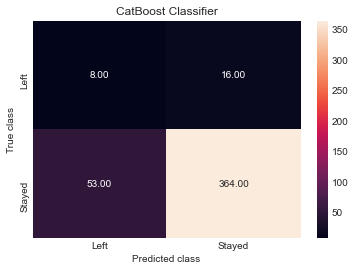

In [46]:
# Confusion matrix generation

cb_cm = metrics.confusion_matrix(predictions, y_test, [1,0])
sns.heatmap(cb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('CatBoost Classifier')
plt.savefig('images/Confusion Matrix for CatBoost Classifier')

In [47]:
# Feature importance

feature_labels = np.array(['Age', 'Gender', 'MaritalStatus', 'DistanceFromHome', 
      'TotalWorkingYears', 'NumCompaniesWorked', 'MonthlyIncome', 'JobRole', 'YearsAtCompany',
      'YearsWithCurrManager', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'JobSatisfaction', 'EnvironmentSatisfaction',
      'RelationshipSatisfaction', 'WorkLifeBalance'])
importance = model.get_feature_importance(type= "FeatureImportance")
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index])))

WorkLifeBalance-3.60%
YearsAtCompany-3.95%
Gender-4.01%
YearsWithCurrManager-4.61%
YearsSinceLastPromotion-4.72%
YearsInCurrentRole-5.05%
TotalWorkingYears-5.34%
RelationshipSatisfaction-5.66%
JobSatisfaction-6.80%
EnvironmentSatisfaction-6.96%
DistanceFromHome-7.08%
NumCompaniesWorked-7.21%
JobRole-7.74%
Age-9.00%
MonthlyIncome-9.10%
MaritalStatus-9.16%


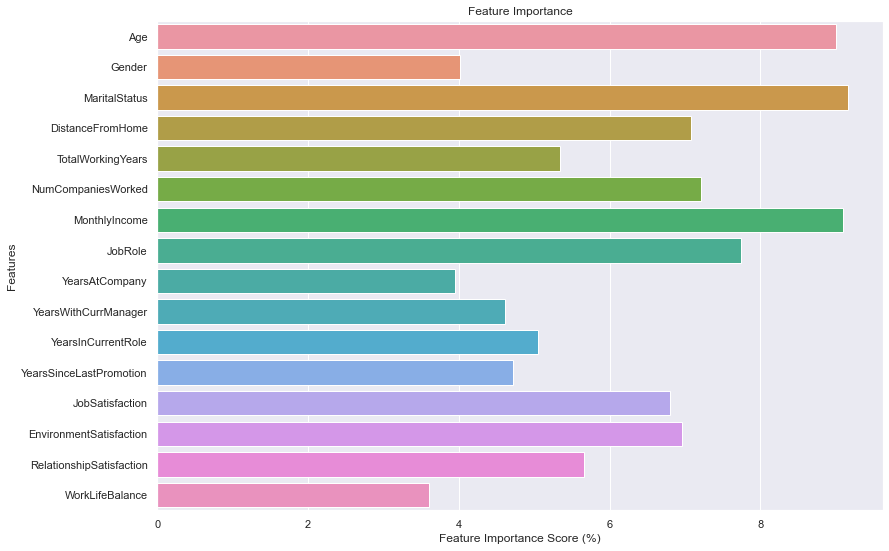

In [48]:
# Creating a bar plot for feature importance
sns.set(rc={'figure.figsize':(13,9)})
sns.barplot(x=importance, y=feature_labels)

# Adding labels
plt.xlabel('Feature Importance Score (%)')
plt.ylabel('Features')
plt.title("Feature Importance")

# Displaying the plot
plt.savefig('images/Feature Importance for CatBoost Classifier')
plt.show()

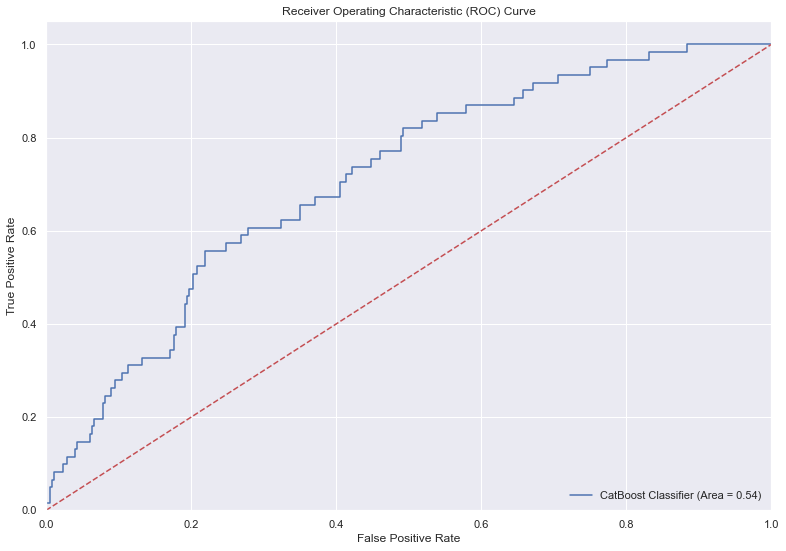

In [49]:
# Receiver Operating Characteristic (ROC) curve generation

get_roc_curve = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='CatBoost Classifier (Area = %0.2f)' % get_roc_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('images/Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [50]:
# Save the CatBoost prediction model

import pickle
pickle.dump(model, open('model.pkl','wb'))